# __Part 5 - Natural Language Processing (NLP) with Recursive Neural Network (RNN)__

# __Natural Language Processing__

__Natural Language Processing (NLP)__ is a discipline in computing that deals with the communication between natural (human) languages and computer languages. 

- A __common example of NLP__ is something like __spellcheck__ or __autocomplete sentence__ or __text translation__. 

- __Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages__. 

\

# __Recurrent Neural Networks__

__Recurrent Neural Network (RNN)__ = __A neural network that is capable of 'processing sequential data' such as `text` or `characters`__.


We will learn how to use a __RNN__ to do the following:

- __Sentiment Analysis = The text processing with context to determine how positive/negative sentence from piece of the text is__

- __Character Generation__

We will look at sequences of text and learn how we can encode them in a meaningful way. Unlike images, __sequence data e.g. long chains of text, weather patterns, videos__ __where the step of time is needed to be processed step by step__ and handled in a special way.


![alt text](https://www.tensorflow.org/static/text/tutorials/images/text_generation_sampling.png)







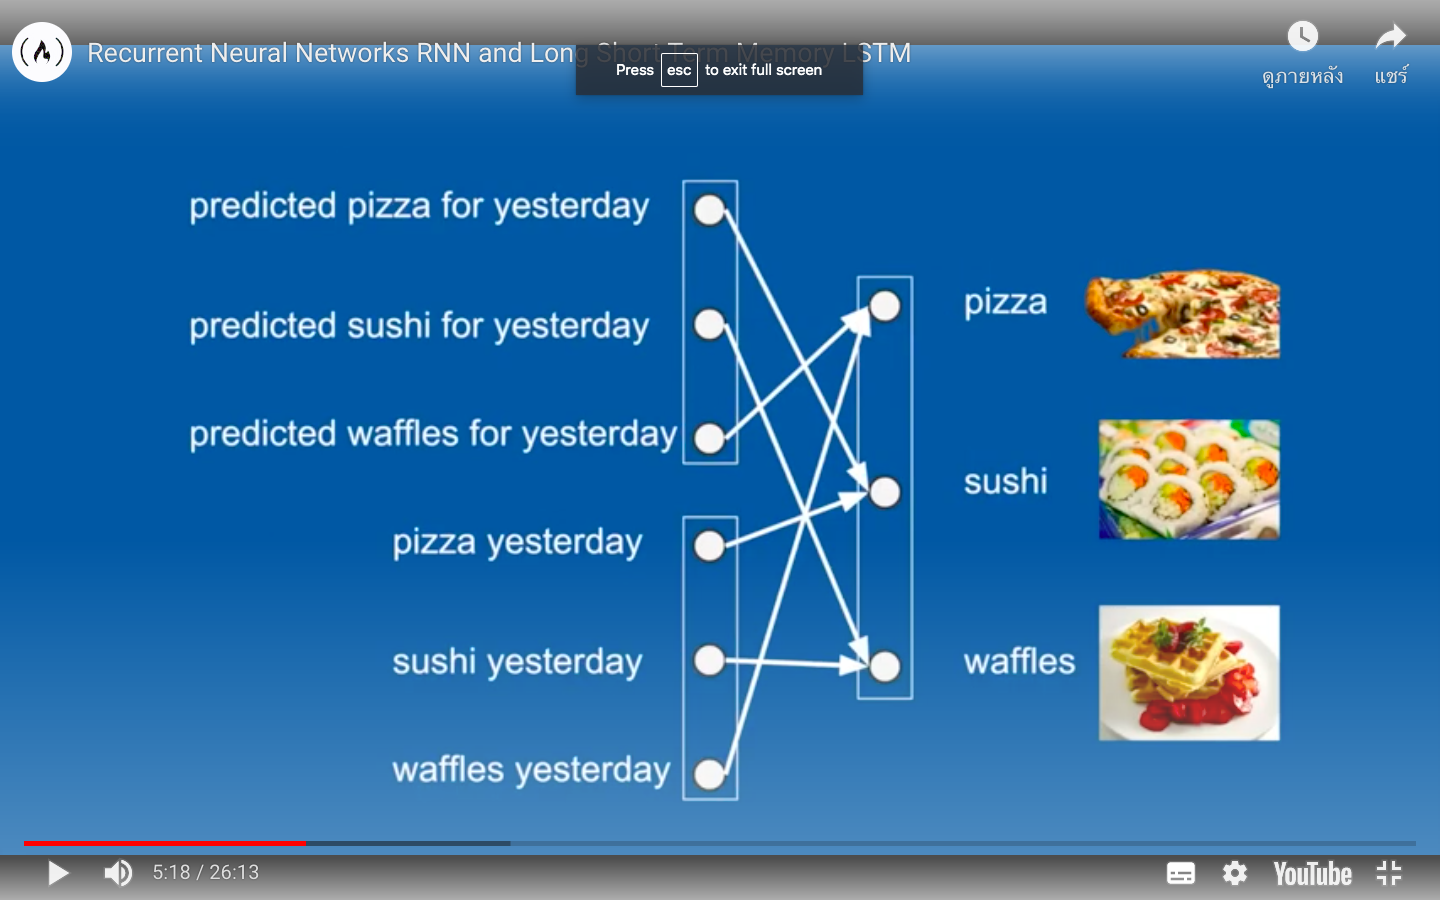

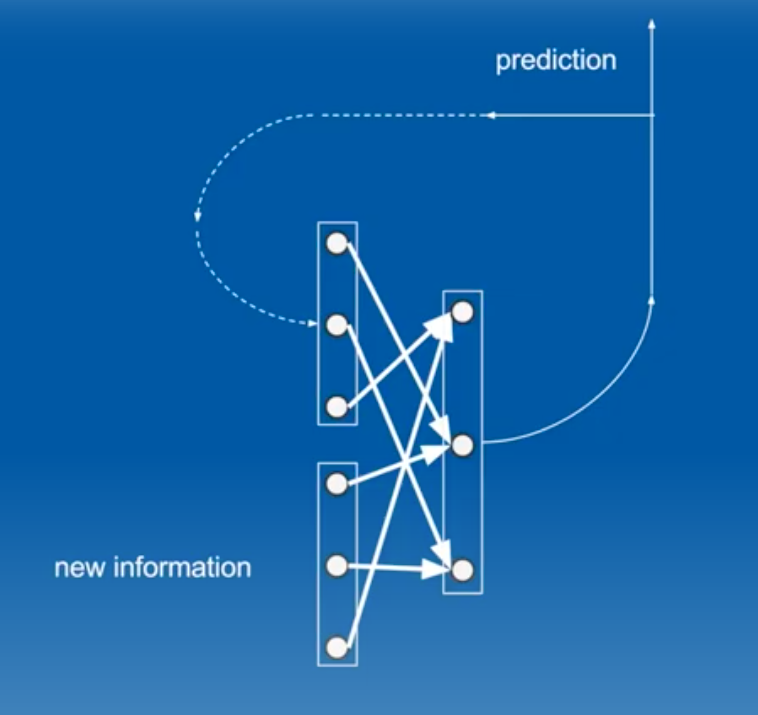



In RNN, we use networks called **feed-forward** neural networks. 

- __This simply means that all our data is fed forwards (all at once) from left to right__ through the network. 


Similarly, we read word by word from left to right and keep track of the current meaning of the sentence so we can understand the meaning of the next word. 

This is exactly what a __recurrent neural network__ is designed to do. 

- __Recurrent neural network is a network that contains a loop.__

- __A RNN will process one word at a time while maintaining an internal memory of what it's already seen.__

- __This will allow it to treat words differently based on their order in a sentence__ and __to slowly build an understanding of the entire input, one word at a time.__
  - Ex: $h_0$ = ' hi '  &nbsp; $\rightarrow$ &nbsp;  $h_1$ = ' hi I ' &nbsp;  $\rightarrow$ &nbsp;  $h_2$ = ' hi I am ' &nbsp;  $\rightarrow$ &nbsp;  $h_3$ = ' hi I am Dio ' 

- __This is why we are treating our text data as a sequence! So that we can pass one word at a time to the RNN.__

Here's a recurrent layer of __simple RNN__ looks like.

![alt text](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/unrolled-rnn.png)
*Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/*

where these variables stand for:

- **h<sub>t</sub>** __output__ at time t

- **x<sub>t</sub>** __input__ at time t

- **'A'** __Recurrent Layer__ (loop)

\

__A Recurrent Layer__: __processes words or input one at a time in a combination with the output from the previous iteration__.
  -  So, __as we progress further in the input sequence, we build a more complex understanding of the text as a whole__.

  - The __downfall of RNN__ : is that __as text sequences get longer it gets increasingly difficult for the network to understand the text properly.__

\

![alt text](https://www.western-neuralnets.ca/week12/wk12_rnn_wordSeq.png)


\

## __RNN with Long Short-Term-Memory (LSTM) layer__


The __RNN layer with faster performance__ than simple RNN is here called __LSTM (Long Short-Term Memory)__. 

-  Due to exist other recurrent layers (layers that contain a loop)

- __This layer works very similarily to the simple RNN layer__ but __adds a way to access inputs from any timestep in the past__. 

  - Whereas simple RNN layer input from previous timestamps gradually disappeared as we got further through the input. 
  
- __With a LSTM, we have a long-term memory data structure storing all the previously seen inputs__ as well as when we saw them. 

- __This allows for us to access any previous value we want at any point in time.__

- This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear. 



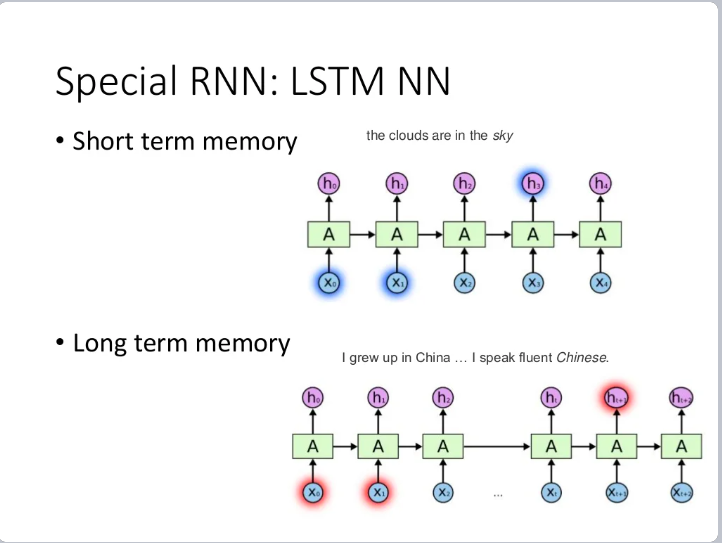

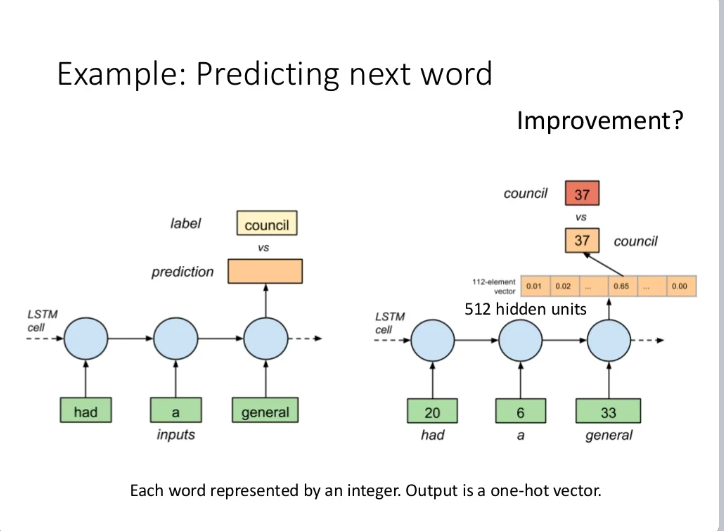

Reference: https://www.slideshare.net/xuyangela/introduction-to-recurrent-neural-network

__Memory layer & LSTM layer Diagram__

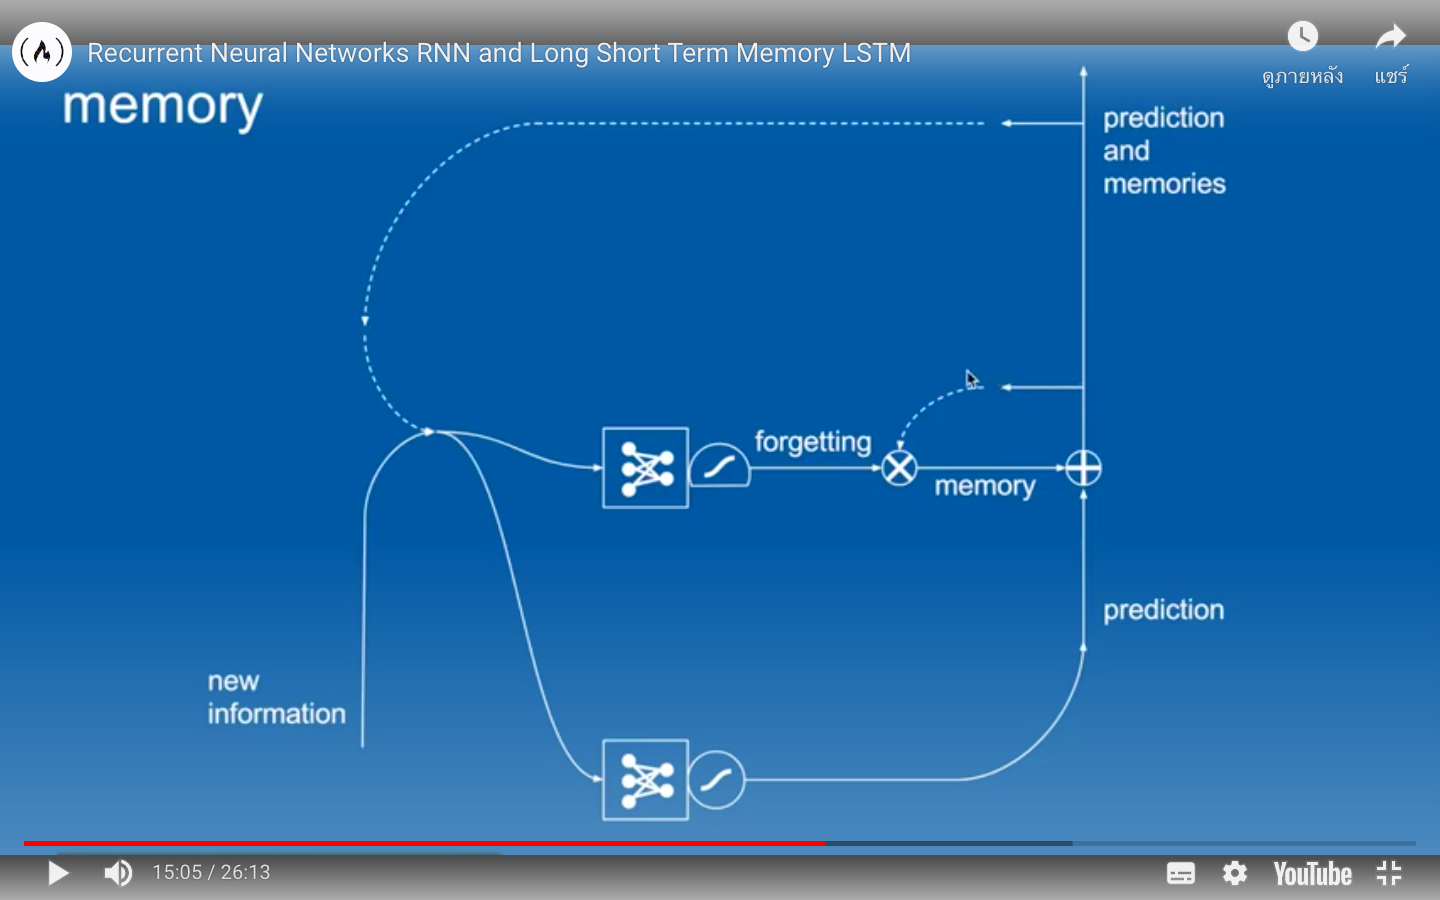




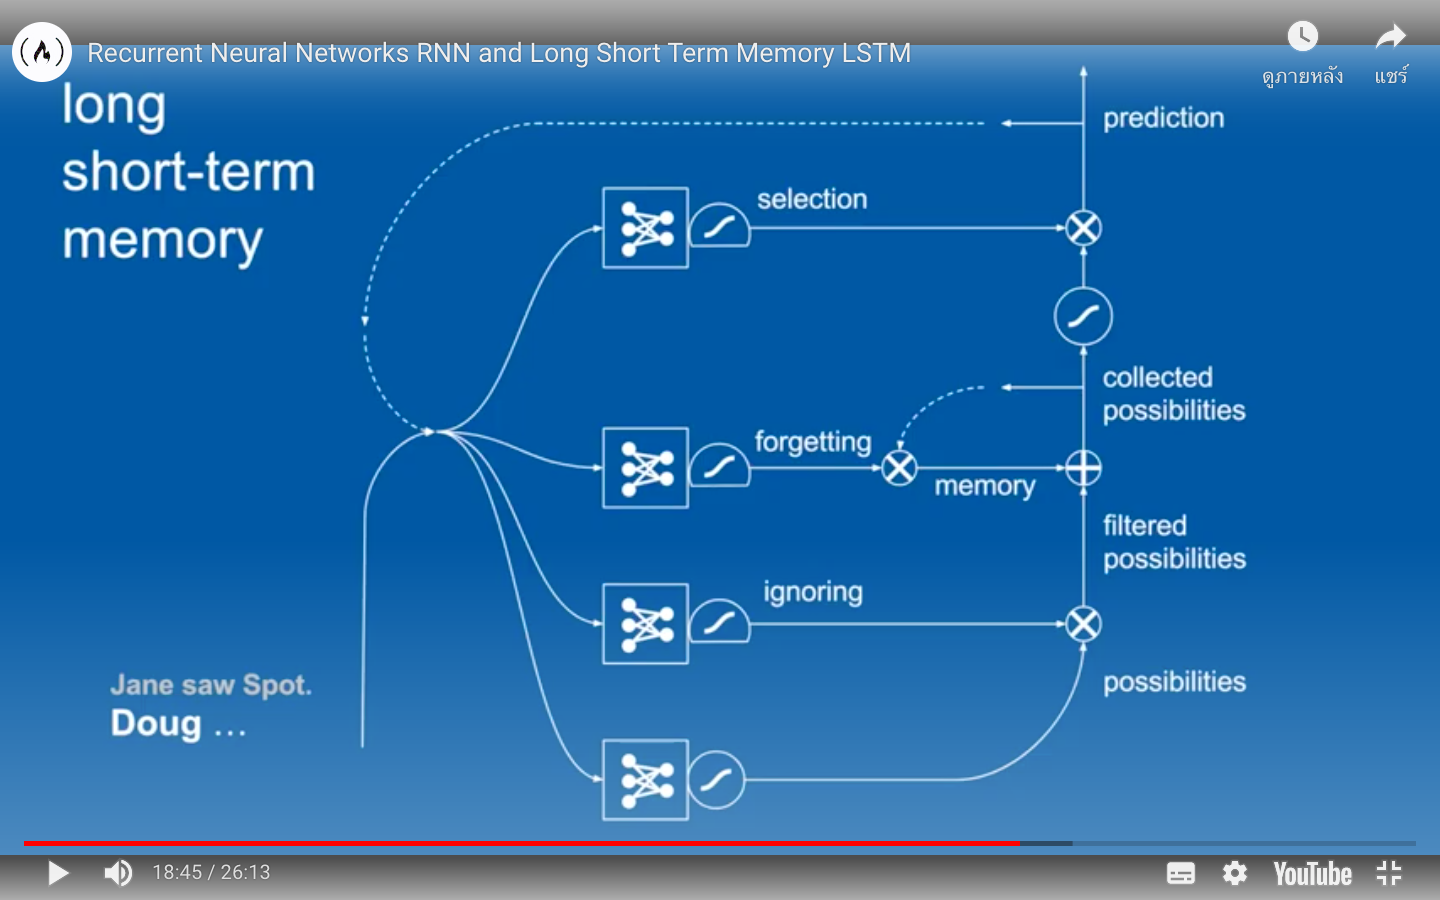

__Plus Junction & Time Junction (Gating)__
 
 - __Gating = Filtered Time junction with multiplying activation function (e.g. sigmoid) - (acting like a faucet)__

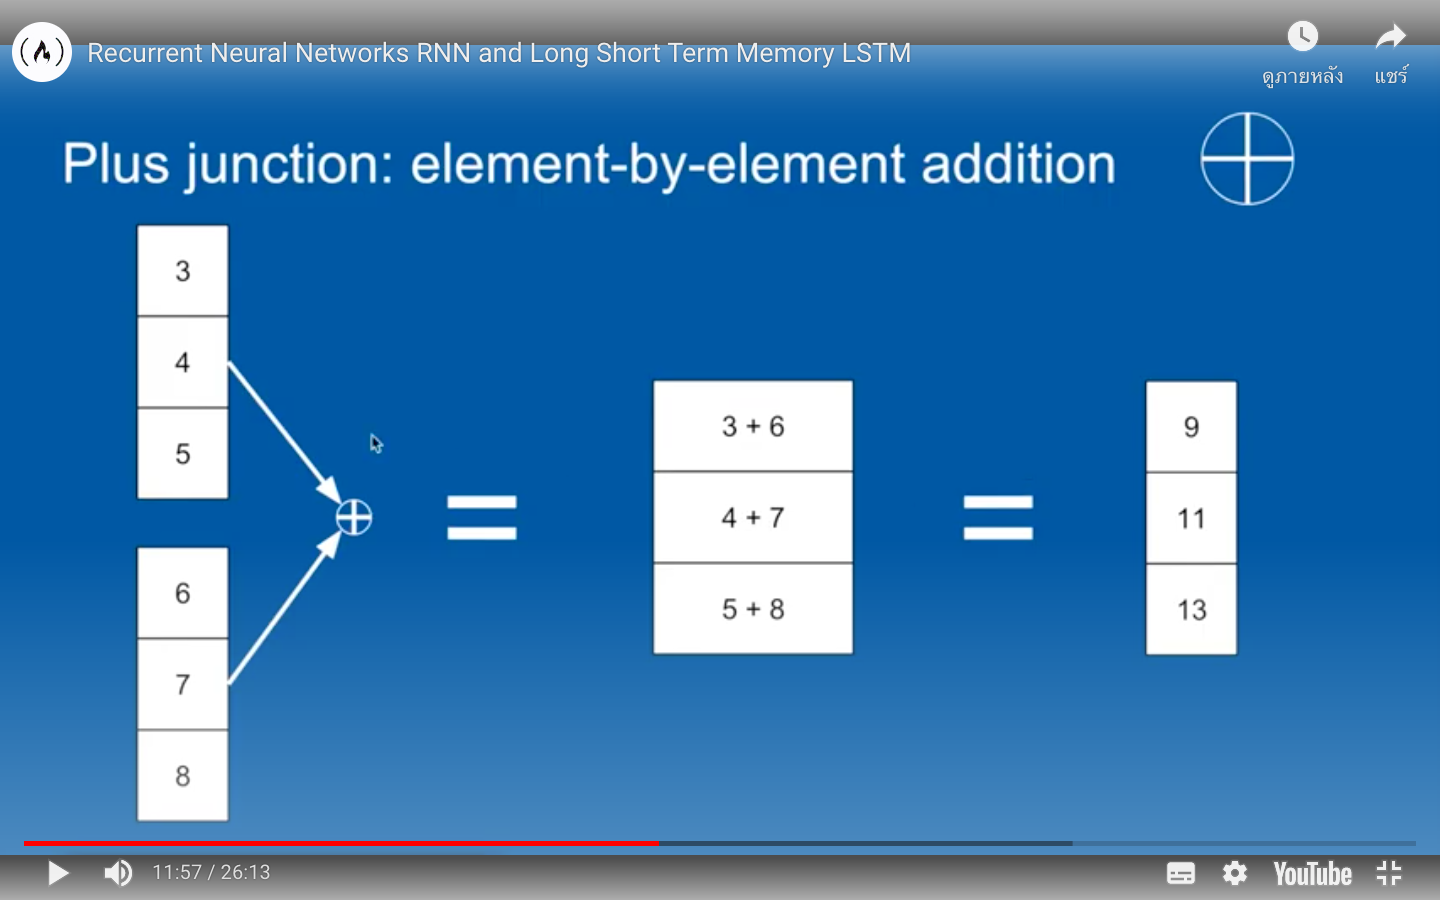

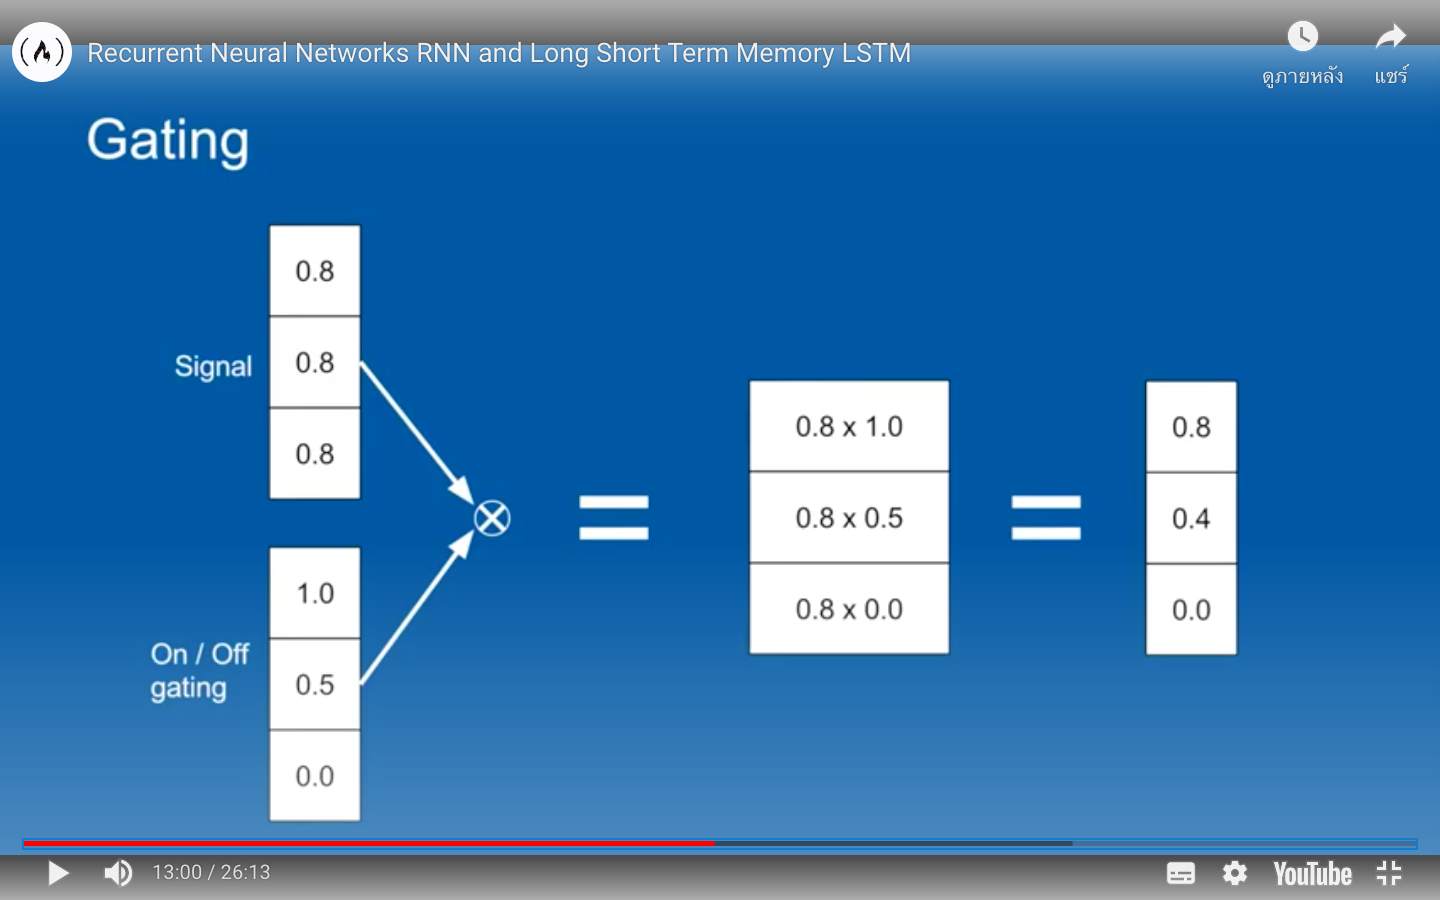

 \

### __Bag of Words__

__Bag of Word__  :  __Each word in a sentence is encoded with an integer__ and thrown into a collection that does not maintain the order of the words but __does keep track of the frequency__.

- Ex: `I am Tim Jay`   &nbsp;  ->  &nbsp;  (`I : 0`),(`am : 1`), (`Tim : 2`), (`Jay : 3`)

In [ ]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1
    
    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1
  
  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


This isn't really the way we would do this in practice.
Notice that we've lost the order in which words appear. 

In fact, let's look at how this encoding works for the two sentences we showed above.



In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

Positive: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1}
Negative: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 21: 1, 18: 1, 19: 1, 20: 1, 17: 1}


We can see that even though these sentences have a very different meaning they are encoded exactly the same way & frequency. 
Here's other text processing to keep text in order.

\

### __Integer Encoding__

The next technique we will look at is called **integer encoding**. 

- __Integer encoding method represents each word or character in a sentence as a unique integer and maintaining the order of these words.__ 

- This should __fix the problem of losing order of words__.


In [ ]:
vocab = {}  
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ") 
  encoding = []  

  for word in words:
    if word in vocab:
      code = vocab[word]  
      encoding.append(code) 
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1
  
  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

[1, 2, 3, 4, 5, 6, 7, 1, 4, 8, 9, 2, 2, 4, 3, 3]
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


And now let's have a look at one hot encoding on our movie reviews.

In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_encode = one_hot_encoding(positive_review)
neg_encode = one_hot_encoding(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Positive: [10, 11, 12, 13, 14, 15, 5, 16, 17, 18, 19, 14, 20, 21]
Negative: [10, 11, 12, 13, 14, 15, 5, 16, 21, 18, 19, 14, 20, 17]


\

### __Word Embeddings__

Luckily there is a third method that is far superior, __word embeddings.__ 

- __Word Embeddings = A vectorized representation of words in a given document that places words with similar meanings near each other.__

- This method __keeps the order of words intact as well as encodes similar words__ with very similar labels. 

- It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. 

- It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an embedding layer to the beginning of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

\

## __Practice with Movie Review Dataset__

- Using Sentiment Analysis to classify 
movie reviews as either postive, negative or neutral.

- We'll start by loading in the __IMDB movie review dataset__ from keras. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. 

- Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.

In [ ]:
# %tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.datasets import imdb
from keras.preprocessing import sequence
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[1] # Lets look at one review

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 23141,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 36893,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 25249,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 46151,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 

### __More Preprocessing__
If we have a look at some of our loaded in reviews, we'll notice that they are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:
- if the review is greater than 250 words then trim off the extra words
- if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.

Keras has a function that can do this for us:




In [ ]:
train_data = pad_sequences(train_data, MAXLEN)
test_data = pad_sequences(test_data, MAXLEN)

### __Creating the Model__

Now it's time to create the model. 

- We'll use a __word embedding layer as the first layer__ in our model and __add a LSTM layer__ afterwards that __feeds into a dense node to get our predicted sentiment__.

- __`32` stands for the output dimension of the vectors generated by the embedding layer__. We can change this value if we'd like!

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


### __Training the model__
Now it's time to compile and train the model. 

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 72s 111ms/step - loss: 0.4182 - acc: 0.8046 - val_loss: 0.3000 - val_acc: 0.8808
Epoch 2/10
625/625 [==============================] - 62s 100ms/step - loss: 0.2383 - acc: 0.9095 - val_loss: 0.2783 - val_acc: 0.8908
Epoch 3/10
625/625 [==============================] - 62s 99ms/step - loss: 0.1850 - acc: 0.9324 - val_loss: 0.2685 - val_acc: 0.8934
Epoch 4/10
625/625 [==============================] - 62s 100ms/step - loss: 0.1518 - acc: 0.9456 - val_loss: 0.2978 - val_acc: 0.8896
Epoch 5/10
625/625 [==============================] - 62s 99ms/step - loss: 0.1290 - acc: 0.9544 - val_loss: 0.2828 - val_acc: 0.8876
Epoch 6/10
625/625 [==============================] - 61s 97ms/step - loss: 0.1093 - acc: 0.9633 - val_loss: 0.3267 - val_acc: 0.8870
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0953 - acc: 0.9681 - val_loss: 0.3452 - val_acc: 0.8888
Epoch 8/10
625/625 [==============================] - 61s 

And we'll evaluate the model on our training data to see how well it performs.

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 20s 25ms/step - loss: 0.5054 - acc: 0.8580
[0.5054386854171753, 0.8580399751663208]


So we're scoring somewhere in the mid-high 80's. Not bad for a simple recurrent network.

### __Making Predictions__
Now let’s use our network to make predictions on our own reviews. 

- __Since our reviews are encoded, we'll need to convert any review__ that we write into that form __so the network can understand it__. 

- To do so, we'll __load the encodings from training dataset__ and __use them to encode our own data.__




In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

1641221/1641221 [==============================] - 0s 0us/step
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [ ]:
# while were at it lets make a decode function
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0     # Padding with zero
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]
  
print(decode_integers(encoded))

that movie was just amazing so amazing


In [ ]:
# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  pred    = np.zeros((1,250))
  pred[0] = encoded_text
  result  = model.predict(pred) 
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)  # The more positive rev prob, the more positive review

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)  # The more negative rev prob, the more negative review


1/1 [==============================] - 1s 532ms/step
[0.92880887]
1/1 [==============================] - 0s 29ms/step
[0.27998433]


### __RNN Play Generator__

We are going to __use a RNN to generate a play__. We will simply show the RNN an example of something we want it to recreate and it will learn how to write a version of it on its own.

- We'll do this __using a character predictive model that will take as input a variable length sequence and predict the next character__.

- __We can use the model many times in a row with the output from the last prediction as the input for the next call to generate a sequence.__

In [ ]:
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

#### __Loading Dataset__

For this example, we only need one peice of training data. In fact, we can write our own poem or play and pass that to the network for training if we'd like. However, to make things easy we'll use an extract from a shakesphere play.




In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


__To load your own data__, you'll need to upload a file from the dialog below. Then you'll need to follow the steps from above but load in this new file instead.


In [ ]:
# from google.colab import files
# path_to_file = list(files.upload().keys())[0]

### __Read Contents of File__


In [ ]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


### __Encoding__
Since this text isn't encoded yet well need to do that ourselves. We are going to __encode each unique character as a different integer__.



In [ ]:
vocab = sorted(set(text))
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [ ]:
# lets look at how part of our text is encoded
print("Text:", text[:13])
print("Encoded:", text_to_int(text[:13]))

Text: First Citizen
Encoded: [18 47 56 57 58  1 15 47 58 47 64 43 52]


And here we will make a function that can convert our numeric values to text.


In [ ]:
def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

First Citizen


### __Creating Training Examples__

Remember our task is to feed the model a sequence and have it return to us the next character.

- This means we need to __split our text data from above into many shorter sequences__ that we can __pass to the model as training examples.__ 

- The training examples we will prepare will use a **`seq_length`** sequence as input and a **`seq_length`** sequence as the output where that sequence is the original sequence shifted one letter to the right. For example:

  - ```input: Hell | output: ello```

Our first step will be to create a stream of characters from our text data.

In [ ]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

Next we can use the batch method to turn this stream of characters into batches of desired length.

In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

Now we need to use these sequences of length 101 and split them into input and output.

In [ ]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell
    target_text = chunk[1:]  # ello
    return input_text, target_text  # hell, ello

dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry

In [ ]:
for x, y in dataset.take(2):
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))



EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 


EXAMPLE

INPUT
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OUTPUT
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


Finally we need to make training batches.

In [ ]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

### __Building the Model__

- We will __use an embedding layer a LSTM__ and __one dense layer that contains a node for each unique character__ in our training data. 

- __The dense layer will give us a probability distribution over all nodes__.

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           16640     
                                                                 
 lstm_1 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_1 (Dense)             (64, None, 65)            66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


### __Creating a Loss Function__

Now we are going to create our own __loss function__ for this problem. 

This is because our model will __output__ a (64, sequence_length, 65) shaped tensor that __represents the probability distribution of each character at each timestep for every sequence in the batch__. 



However, before we do that let's have a look at a sample input and the output from our untrained model. This is so we can understand what the model is giving us.



In [ ]:
for input_example_batch, target_example_batch in data.take(1):
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [ ]:
# we can see that the prediction is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions))
print(example_batch_predictions)

64
tf.Tensor(
[[[-5.9462721e-03  1.9266177e-04 -2.7385980e-03 ...  4.5770528e-03
    5.8787334e-04  1.5118807e-03]
  [-1.6040079e-03 -3.4393696e-04 -6.0293134e-03 ...  4.2433450e-03
    7.3468103e-04  2.2400946e-03]
  [ 6.8075117e-04 -4.9714115e-04 -8.5048554e-03 ...  5.9179431e-03
    7.1362173e-04  3.0883041e-03]
  ...
  [-1.2998210e-02  2.7159494e-03 -1.0118062e-02 ...  8.8286037e-03
   -7.4910973e-03  3.3028247e-03]
  [-1.6681463e-02  2.9637988e-03 -6.3859886e-03 ...  8.0360696e-03
   -1.0204965e-02  9.0284673e-03]
  [-8.8798814e-03  1.0913690e-03 -7.5363424e-03 ...  6.8144230e-03
   -8.2738493e-03  7.3998836e-03]]

 [[-7.4901083e-03 -1.0008998e-03 -4.7215139e-03 ...  5.0551617e-03
   -7.4753910e-04 -8.0899498e-04]
  [-2.8925233e-03 -3.4563342e-04 -6.7855185e-03 ...  7.2709201e-03
   -1.3088757e-03  1.0118028e-03]
  [ 1.1278334e-03  3.4496014e-04 -7.4254787e-03 ...  4.2145788e-03
    3.7641865e-03  6.6658377e-04]
  ...
  [ 2.3013942e-03  7.9903123e-04 -2.9465111e-03 ...  1.3059252e

In [ ]:
# lets examine one prediction
pred = example_batch_predictions[0]
print(len(pred))
print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

100
tf.Tensor(
[[-0.00594627  0.00019266 -0.0027386  ...  0.00457705  0.00058787
   0.00151188]
 [-0.00160401 -0.00034394 -0.00602931 ...  0.00424334  0.00073468
   0.00224009]
 [ 0.00068075 -0.00049714 -0.00850486 ...  0.00591794  0.00071362
   0.0030883 ]
 ...
 [-0.01299821  0.00271595 -0.01011806 ...  0.0088286  -0.0074911
   0.00330282]
 [-0.01668146  0.0029638  -0.00638599 ...  0.00803607 -0.01020497
   0.00902847]
 [-0.00887988  0.00109137 -0.00753634 ...  0.00681442 -0.00827385
   0.00739988]], shape=(100, 65), dtype=float32)


In [ ]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

65
tf.Tensor(
[-0.00594627  0.00019266 -0.0027386  -0.00090725  0.00112477 -0.00178382
  0.00461665 -0.00091616  0.00283499 -0.00258703  0.00107399  0.00150228
 -0.00873638 -0.00746851  0.0039142   0.00169705  0.00508828  0.00290112
 -0.00405642 -0.00129079 -0.00726245 -0.0006051  -0.00140794  0.00163598
 -0.00549771  0.00163869 -0.00033818  0.00170387 -0.00316638 -0.00039621
  0.00114642  0.0064077   0.00240102  0.00182844 -0.00162216 -0.00096213
  0.00103289  0.00267353  0.00203725 -0.00239655  0.0051403   0.00169482
 -0.00210287  0.00188863 -0.00132333  0.00854384 -0.00314708 -0.00349028
  0.0038707   0.00169994  0.00056269 -0.00107665 -0.00080565  0.00084438
  0.00011172 -0.00300732  0.00047112  0.00594206 -0.00202164  0.00395519
  0.00357688  0.00246658  0.00457705  0.00058787  0.00151188], shape=(65,), dtype=float32)


In [ ]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to numbers to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

"J'nxkDgrMFqkPhsvo&VZ&dmRA fHov,UosW,pLiuE;ZPOgfVieoFzhBOPonTFcY:.I?iUs'pjsbWiF$D cZ3N\nDqmbNqL?3nmCi'"

So now we need to __create a loss function that can compare that output to the expected output and give us some numeric value representing how close the two were__. 

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

### __Compiling the Model__

At this point we can think of our problem as a __classification problem where the model predicts the probabillity of each unique letter coming next__. 


In [ ]:
model.compile(optimizer='adam', loss=loss)

### __Creating Checkpoints__
Now we are going to setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

###__Training the model__

Finally, we will start training the model. (Better change runtime into GPU)

In [ ]:
history = model.fit(data, epochs=5, callbacks=[checkpoint_callback])

Epoch 1/5
172/172 [==============================] - 1380s 8s/step - loss: 2.5612
Epoch 2/5
172/172 [==============================] - 1428s 8s/step - loss: 1.8797
Epoch 3/5
172/172 [==============================] - 1403s 8s/step - loss: 1.6335
Epoch 4/5
172/172 [==============================] - 1371s 8s/step - loss: 1.5016
Epoch 5/5
172/172 [==============================] - 1393s 8s/step - loss: 1.4205


###__Loading the Model__

We'll rebuild the model from a checkpoint using a __batch_size of 1__ so that we can __feed one piece of text to the model__ and have it __make a prediction.__

In [ ]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

Once the model is finished training, we can find the **lastest checkpoint** that stores the models weights using the following line.



In [ ]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

We can load **any checkpoint** we want by specifying the exact file to load.

In [ ]:
checkpoint_num = 5
model.load_weights("./training_checkpoints/ckpt_" + str(checkpoint_num))
model.build(tf.TensorShape([1, None]))

### __Generating Text__

Now we can use the generate text function provided by tensorflow to generate some text using any starting string we'd like.

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

Type a starting string: dio
dione hidsh the affected in his master--
To king in bight on againsterant in my throne!
As one forcun, for aill the news?

CYINGO,
To think thou despart.
Did you.

VIRCENTIO:
But if it bloss?

ISTBELEXNERD II:
The early were heed. Cote-with
the queen is do it.

First Seevenger:
She arrey Caliant; they hadmand before une ill king.

BIANCA:
Look nothing have: and not the all!
Witch and rest here, and it dit your honours.

BENVOLIO:
He hand for my lord's envied. one honour, would I spark.
I am a dusinant
To here wh pen like tefts I little eye.

BICHAPID:
Thou wilt, where As here undo?

DUKE VINCENTIO:
A hand with wagon, nothing by a bun we are to mo?

JULIET:
I shall shie.

yer are thereon, say 'twill make the landeres for
came, made like to love and customioner, I
Could upon him? 
Shepherd!

PO


***

##__Summary NLP workframe w/ RNN__

In [ ]:
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

In [ ]:
# from google.colab import files
# path_to_file = list(files.upload().keys())[0]

In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [ ]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

In [ ]:
vocab = sorted(set(text))
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [ ]:
# lets look at how part of our text is encoded
# print("Text:", text[:13])
# print("Encoded:", text_to_int(text[:13]))

In [ ]:
def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

In [ ]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [ ]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell
    target_text = chunk[1:]  # ello
    return input_text, target_text  # hell, ello

dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry

In [ ]:
# for x, y in dataset.take(2):
#   print("\n\nEXAMPLE\n")
#   print("INPUT")
#   print(int_to_text(x))
#   print("\nOUTPUT")
#   print(int_to_text(y))

In [ ]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

In [ ]:
for input_example_batch, target_example_batch in data.take(1):
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

In [ ]:
# we can see that the prediction is an array of 64 arrays, one for each entry in the batch
# print(len(example_batch_predictions))
# print(example_batch_predictions)

In [ ]:
# lets examine one prediction
pred = example_batch_predictions[0]
# print(len(pred))
# print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

In [ ]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
# print(len(time_pred))
# print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

In [ ]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to numbers to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
history = model.fit(data, epochs=5, callbacks=[checkpoint_callback])

In [ ]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

In [ ]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [ ]:
checkpoint_num = 10
model.load_weights("./training_checkpoints/ckpt_" + str(checkpoint_num))
model.build(tf.TensorShape([1, None]))

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

***

## __Conclusion__

Let’s recap major takeaways from this post:

- __Language Modeling__ is a system that predicts the next word. As a benchmark task that helps us measure our progress on understanding language, it is also a sub-component of other Natural Language Processing systems, such as __Machine Translation, Text Summarization, Speech Recognition.__

- __Recurrent Neural Networks__ __take sequential input__ of any length, __apply the same weights on each step__, and can optionally __produce output on each step.__ Overall, __RNNs are a great way to build a Language Model__.

  - Besides, __RNNs are useful for much more: Sentence Classification, Part-of-speech Tagging, Question Answering__.


\

#### __Reference__
- https://builtin.com/data-science/recurrent-neural-networks-powerhouse-language-modeling